In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
import re

LOADING THE DATASET


In [4]:
df=pd.read_csv('/content/chatgpt_reviews.csv')
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


STANDARDIZING THE COLUMNS NAME

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')


**CLEANING THE DATASET**

In [6]:
df.isnull().sum()

,0
review_id,0
review,6
ratings,0
review_date,0


In [7]:
df['review'] = df['review'].fillna('')

**SENTIMENT POLARITY ANALYSIS**

In [8]:
def func_sentiment_polarity(text):
  if pd.isna(text) or text == '':
        return 0

  blob = TextBlob(str(text))
  return blob.sentiment.polarity

df['sentiment_polarity'] = df['review'].apply(func_sentiment_polarity)

In [9]:
df['sentiment_polarity']

,sentiment_polarity
0,0.7000
1,0.7000
2,0.6000
3,0.6000
4,0.4125
...,...
188639,0.5000
188640,0.7000
188641,1.0000
188642,1.0000


In [10]:
def sentiment_category(polarity):
  if polarity > 0.1:
    return 'Positive'
  elif polarity < -0.1:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment_category'] = df['sentiment_polarity'].apply(sentiment_category)

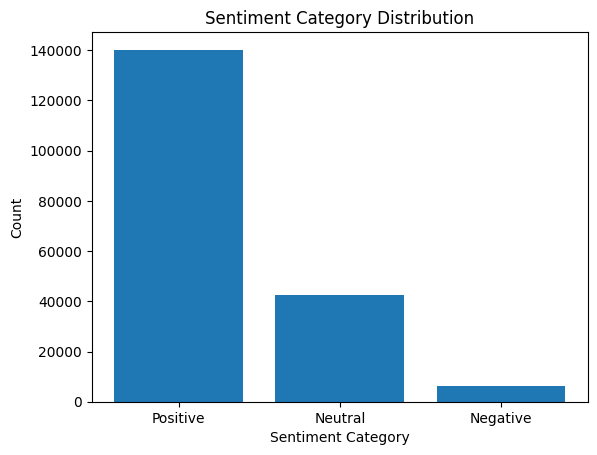

In [11]:
sentiment_counts = df['sentiment_category'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Category Distribution')
plt.show()

**SENTIMENT SUBJECTIVITY ANALYSIS**

In [12]:
def func_sentiment_subjectivity(text):
  if pd.isna(text) or text == '':
        return 0

  blob = TextBlob(str(text))
  return blob.sentiment.subjectivity

df['sentiment_subj'] = df['review'].apply(func_sentiment_subjectivity)

In [13]:
df['sentiment_subj']

,sentiment_subj
0,0.600000
1,0.600000
2,1.000000
3,1.000000
4,0.542949
...,...
188639,0.600000
188640,0.600000
188641,1.000000
188642,1.000000


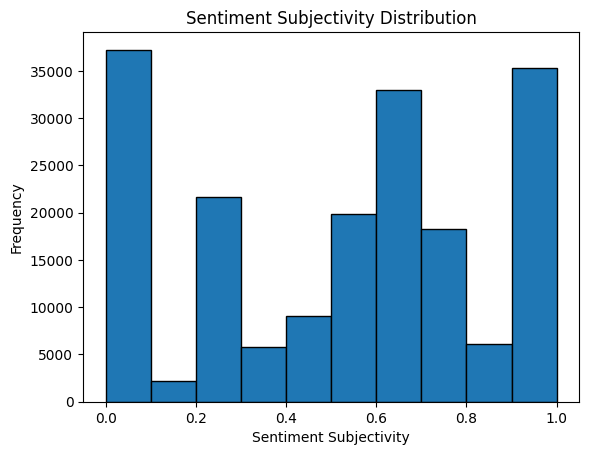

In [14]:
plt.hist(df['sentiment_subj'], bins=10, edgecolor = 'black')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.title('Sentiment Subjectivity Distribution')
plt.show()

MOST COMMON POSITIVE PHASES

In [15]:
positive_reviews = df[df['sentiment_category']=='Positive']['review']

In [16]:
all_pos_text = ' '.join(positive_reviews).lower()

In [17]:
#Cleaned text

cleaned_text = re.sub(r'[^a-zA-Z\s]','', all_pos_text)

In [18]:
#Words in cleaned text, which haS length > 2

words = cleaned_text.split()
words_list = [word for word in words if len(word)>2]

In [19]:
#Now making phrases

phrases = []
for i in range(len(words_list)-1):
  phrase = words_list[i] + ' ' + words_list[i+1]
  phrases.append(phrase)

for i in range(len(words_list)-2):
  phrase = words_list[i] + ' ' + words_list[i+1] + ' ' + words_list[i+2]
  phrases.append(phrase)

In [20]:
#Checking most common phrase

mostcommon_phrases = pd.Series(phrases).value_counts().head(10)

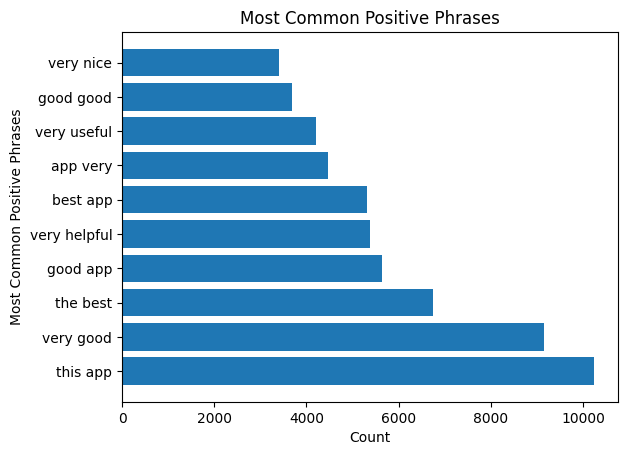

In [21]:
plt.barh(mostcommon_phrases.index, mostcommon_phrases.values)
plt.ylabel('Most Common Positive Phrases')
plt.xlabel('Count')
plt.title('Most Common Positive Phrases')
plt.show()

MOST COMMON NEGATIVE PHRASE

In [22]:
negative_review = df[df['sentiment_category']=='Negative']['review']

In [23]:
all_neg = ' '.join(negative_review).lower()

In [24]:
nwords = all_neg.split()

In [25]:
nword_list = [word for word in nwords if len(word)>2]

In [26]:
nphrase = []

for i in range(len(nword_list) - 1):
  p = nword_list[i] + ' '+ nword_list[i+1]
  nphrase.append(p)

for i in range(len(nword_list) -2):
  p = nword_list[i] + ' ' + nword_list[i+1] + ' ' + nword_list[i+2]
  nphrase.append(p)


In [27]:
most_common_negphrase = pd.Series(nphrase).value_counts().head(10)

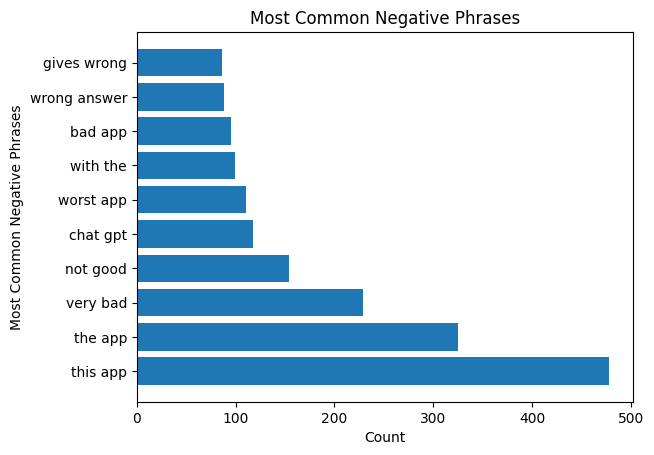

In [28]:
plt.barh(most_common_negphrase.index, most_common_negphrase.values)
plt.ylabel('Most Common Negative Phrases')
plt.xlabel('Count')
plt.title('Most Common Negative Phrases')
plt.show()

CATEGORISATION OF NEUTRAL TEXT





In [29]:
neutral_reviews = df[df['sentiment_category'] == 'Neutral']['review']

In [32]:
neutral_map = {
    'Requests': ['add', 'remove', 'include', 'feature', 'wish', 'hope', 'exclude'],
    'Question': ['how', 'why', 'what', 'when', 'where', 'can', 'does', 'do'],
    'Pos-leaning': ['good', 'nice', 'ok', 'fine', 'decent', 'works'],
    'Neg-leaning': ['but', 'however', 'issue', 'problem', 'concern', 'could be better']
}


neu_category = []

for text in neutral_reviews:
  lower_text = str(text).lower()
  for category, keywords in neutral_map.items():
    for keyword in keywords:
      if keyword in lower_text:
        neu_category.append(category)

  else:
    neu_category.append('Truly Neutral')

In [34]:
from typing import Counter
# Counting each categoruies

count_category = Counter(neu_category)
count_category

Counter({'Truly Neutral': 42357,
         'Question': 12174,
         'Requests': 1406,
         'Pos-leaning': 2445,
         'Neg-leaning': 3757})

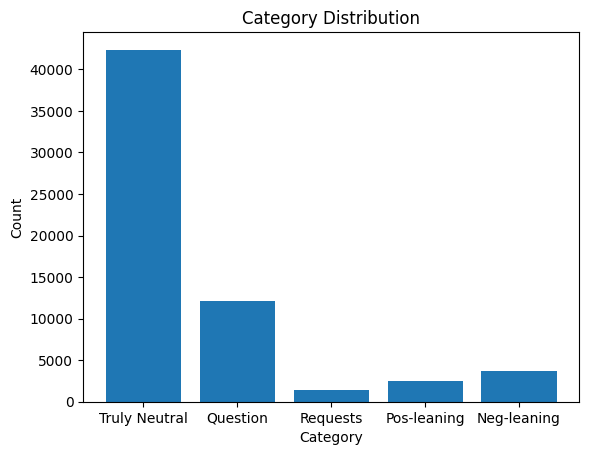

In [43]:
plt.bar(count_category.keys(), count_category.values())
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.show()

CATEGORISATION OF NEGATIVE TEXT


In [45]:
negative_map = {
    'Performance': ['slow', 'lag', 'crash', 'freeze', 'glitch', 'bug', 'error'],
    'Features': ['missing', 'lack', 'need', 'want', 'should', 'feature'],
    'User Experience': ['confusing', 'difficult', 'hard', 'complicated', 'interface'],
    'Accuracy': ['wrong', 'incorrect', 'bad', 'poor', 'inaccurate', 'mistake'],
    'Subscription': ['expensive', 'price', 'cost', 'pay', 'subscription', 'money']
}


neg_cat  = []

for text in negative_review:
  lower_neg = str(text).lower()

  for category, keywords in negative_map.items():
    for keyword in keywords:
      if keyword in lower_neg:
        neg_cat.append(category)

  else:
    neg_cat.append('Truly Negative')


In [49]:
#Counting negative categories

neg_category = Counter(neg_cat)
neg_category

Counter({'Accuracy': 1550,
         'Subscription': 319,
         'Truly Negative': 6106,
         'Performance': 616,
         'Features': 678,
         'User Experience': 216})

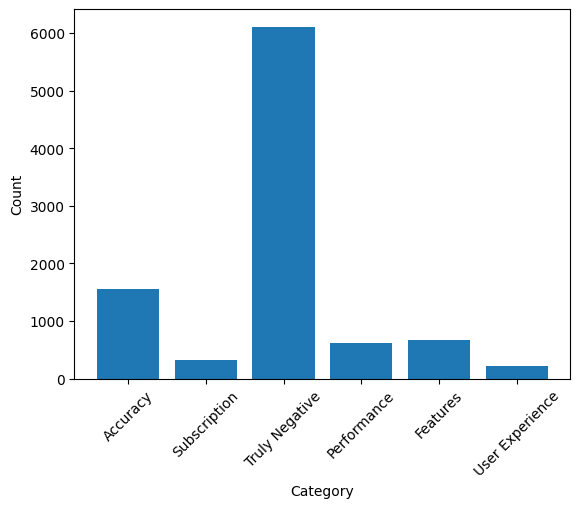

In [53]:
plt.bar(neg_category.keys(), neg_category.values())
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Thank you.
